# Separate runs by HKLE due to size limits

In [1]:
datafile='focused.1000.T.csv.gz'

In [2]:
hkle='HERVK113'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

In [3]:
threshold=3

---

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.6.3'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
default_max_columns=pd.get_option('display.max_columns')

In [14]:
default_max_rows=pd.get_option('display.max_rows')

In [15]:
default_precision=pd.get_option('display.precision')

In [16]:
pd.set_option('display.precision', 2)

In [17]:
#default_threshold=np.get_printoptions()['threshold']

In [18]:
#np.set_printoptions(threshold=10000000)

---

# Read Metadata 1

In [19]:
mt1=pd.read_csv("metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [20]:
mt1.shape

(127, 5)

In [21]:
mt1.rename(columns={"submitter": "subject"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)

In [22]:
mt1.head()

,subject,days_to_death,gender1,disease_type,center_name
0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [23]:
list(mt1)

['subject', 'days_to_death', 'gender1', 'disease_type', 'center_name']

---

# Read Metadata 2

In [24]:
mt2=pd.read_csv("TCGA.Glioma.metadata.tsv",sep="\t")

In [25]:
mt2.shape

(1114, 18)

In [26]:
mt2.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.76,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.73,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.33,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.33,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.16,1.0


In [27]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [28]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [29]:
mt2[['subject','case_submitter_id']].head()

,subject,case_submitter_id
0,02-0001,TCGA-02-0001
1,02-0003,TCGA-02-0003
2,02-0004,TCGA-02-0004
3,02-0006,TCGA-02-0006
4,02-0007,TCGA-02-0007


In [30]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [31]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

---

# Merge Metadata

In [32]:
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')

In [33]:
del mt1
del mt2

In [34]:
meta.head()

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,subject,days_to_death,gender1,disease_type,center_name
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,Methylated,63.0,47.57,1.0,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,NaN,68.0,12.32,1.0,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,NaN,63.0,3.19,1.0,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [35]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [36]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [37]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],
      dtype='object')

In [38]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     35
Oligodendroglioma, NOS           33
Astrocytoma, anaplastic          24
Mixed glioma                     16
Astrocytoma, NOS                  9
Oligodendroglioma, anaplastic     8
Name: primary_diagnosis, dtype: int64

In [39]:
meta['TERT'].value_counts()

Mutant    68
WT        54
Name: TERT, dtype: int64

In [40]:
meta['IDH'].value_counts()

Mutant    74
WT        50
Name: IDH, dtype: int64

In [41]:
meta['x1p19q'].value_counts()

non-codel    102
codel         23
Name: x1p19q, dtype: int64

In [42]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    90
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

In [43]:
meta['gender1'].value_counts()

male      72
female    53
Name: gender1, dtype: int64

In [44]:
meta['race'].value_counts()

white                        114
black or african american      7
not reported                   3
asian                          1
Name: race, dtype: int64

In [45]:
meta['ethnicity'].value_counts()

not hispanic or latino    108
not reported               11
hispanic or latino          6
Name: ethnicity, dtype: int64

In [46]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    51
IDH-WT:1p19q-non-codel        50
IDH-Mutant:1p19q-codel        23
IDH-NA:1p19q-non-codel         1
Name: IDH_1p19q_status, dtype: int64

In [47]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             29
oligodendroglioma:IDH-Mutant:1p19q-codel        23
astrocytoma:IDH-Mutant:1p19q-non-codel          18
astrocytoma:IDH-WT:1p19q-non-codel              13
oligodendroglioma:IDH-Mutant:1p19q-non-codel    13
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     11
glioblastoma:IDH-Mutant:1p19q-non-codel          5
oligoastrocytoma:IDH-WT:1p19q-non-codel          4
oligodendroglioma:IDH-WT:1p19q-non-codel         4
Name: WHO_groups, dtype: int64

In [48]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        49
IDH-WT:1p19q-non-codel:TERT-Mutant        44
IDH-Mutant:1p19q-codel:TERT-Mutant        22
IDH-WT:1p19q-non-codel:TERT-WT             4
IDH-WT:1p19q-non-codel:TERT-NA             2
IDH-Mutant:1p19q-non-codel:TERT-NA         1
IDH-Mutant:1p19q-codel:TERT-WT             1
IDH-Mutant:1p19q-non-codel:TERT-Mutant     1
IDH-NA:1p19q-non-codel:TERT-Mutant         1
Name: Triple_group, dtype: int64

In [49]:
meta['MGMT'].value_counts()

Methylated      87
Unmethylated    27
Name: MGMT, dtype: int64

In [50]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    75
Harvard Medical School                50
Name: center_name, dtype: int64

---

# Read raw data and cleanup

In [51]:
#df=pd.read_csv("focused.csv.gz",header=[0,1,2,3],index_col=[0,1])
#df.columns.names=['sample','pup','hkle','q']
#df=df.T
df=pd.read_csv(datafile,header=[0,1],index_col=[0,1,2,3])
#df.reset_index(inplace=True)
#df=pd.read_csv(datafile,header=[0,1]) #,index_col=[0,1,2,3])
df.head()

chromosome                          chr1                                  \
position                         1048000 1190000 1308000 1409000 1410000   
sample      pup    hkle     mapq                                           
02-2483-01A paired HERVK113 Q20        0       0       0       4       1   
                   SVA_A    Q20        0       0       0       0       0   
                   SVA_B    Q20        0       0       0       0       0   
                   SVA_C    Q20        0       0       0       0       0   
                   SVA_D    Q20        0       0       0       0       0   

chromosome                                                                ...  \
position                         1580000 1581000 2211000 2513000 2581000  ...   
sample      pup    hkle     mapq                                          ...   
02-2483-01A paired HERVK113 Q20        4       0       0       0       0  ...   
                   SVA_A    Q20        0       0       0       0       0  ...   
                   SVA_B    Q20        0       0       0       0       0  ...   
                   SVA_C    Q20        0       0       0       0       0  ...   
                   SVA_D    Q20        0       0       0       0       0  ...   

chromosome                           chrY                                      \
position                         19535000 19536000 19699000 19700000 20552000   
sample      pup    hkle     mapq                                                
02-2483-01A paired HERVK113 Q20         0        0        2        0        0   
                   SVA_A    Q20         0        0        0        0        0   
                   SVA_B    Q20         0        0        0        0        0   
                   SVA_C    Q20         0        0        0        0        0   
                   SVA_D    Q20         0        0        0        0        0   

chromosome                                                                     
position                         20553000 20976000 21047000 21217000 21639000  
sample      pup    hkle     mapq                                               
02-2483-01A paired HERVK113 Q20         0        0        0        0        0  
                   SVA_A    Q20         0        0        0        0        0  
                   SVA_B    Q20         0        0        0        0        0  
                   SVA_C    Q20         0        0        0        0        0  
                   SVA_D    Q20         0        0        0        0        0  

[5 rows x 17409 columns]

In [52]:
df.columns= [' '.join(col).strip() for col in df.columns.values]
df.head()

chr1 1048000  chr1 1190000  chr1 1308000  \
sample      pup    hkle     mapq                                             
02-2483-01A paired HERVK113 Q20              0             0             0   
                   SVA_A    Q20              0             0             0   
                   SVA_B    Q20              0             0             0   
                   SVA_C    Q20              0             0             0   
                   SVA_D    Q20              0             0             0   

                                  chr1 1409000  chr1 1410000  chr1 1580000  \
sample      pup    hkle     mapq                                             
02-2483-01A paired HERVK113 Q20              4             1             4   
                   SVA_A    Q20              0             0             0   
                   SVA_B    Q20              0             0             0   
                   SVA_C    Q20              0             0             0   
                   SVA_D    Q20              0             0             0   

                                  chr1 1581000  chr1 2211000  chr1 2513000  \
sample      pup    hkle     mapq                                             
02-2483-01A paired HERVK113 Q20              0             0             0   
                   SVA_A    Q20              0             0             0   
                   SVA_B    Q20              0             0             0   
                   SVA_C    Q20              0             0             0   
                   SVA_D    Q20              0             0             0   

                                  chr1 2581000  ...  chrY 19535000  \
sample      pup    hkle     mapq                ...                  
02-2483-01A paired HERVK113 Q20              0  ...              0   
                   SVA_A    Q20              0  ...              0   
                   SVA_B    Q20              0  ...              0   
                   SVA_C    Q20              0  ...              0   
                   SVA_D    Q20              0  ...              0   

                                  chrY 19536000  chrY 19699000  chrY 19700000  \
sample      pup    hkle     mapq                                                
02-2483-01A paired HERVK113 Q20               0              2              0   
                   SVA_A    Q20               0              0              0   
                   SVA_B    Q20               0              0              0   
                   SVA_C    Q20               0              0              0   
                   SVA_D    Q20               0              0              0   

                                  chrY 20552000  chrY 20553000  chrY 20976000  \
sample      pup    hkle     mapq                                                
02-2483-01A paired HERVK113 Q20               0              0              0   
                   SVA_A    Q20               0              0              0   
                   SVA_B    Q20               0              0              0   
                   SVA_C    Q20               0              0              0   
                   SVA_D    Q20               0              0              0   

                                  chrY 21047000  chrY 21217000  chrY 21639000  
sample      pup    hkle     mapq                                               
02-2483-01A paired HERVK113 Q20               0              0              0  
                   SVA_A    Q20               0              0              0  
                   SVA_B    Q20               0              0              0  
                   SVA_C    Q20               0              0              0  
                   SVA_D    Q20               0              0              0  

[5 rows x 17409 columns]

In [53]:
df.reset_index(inplace=True)

In [54]:
df['subject']=df['sample'].str[0:7]
df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1913    TQ-A8XE
1914    TQ-A8XE
1915    TQ-A8XE
1916    TQ-A8XE
1917    TQ-A8XE
Name: subject, Length: 1918, dtype: object

In [55]:
df.columns

Index(['sample', 'pup', 'hkle', 'mapq', 'chr1 1048000', 'chr1 1190000',
       'chr1 1308000', 'chr1 1409000', 'chr1 1410000', 'chr1 1580000',
       ...
       'chrY 19536000', 'chrY 19699000', 'chrY 19700000', 'chrY 20552000',
       'chrY 20553000', 'chrY 20976000', 'chrY 21047000', 'chrY 21217000',
       'chrY 21639000', 'subject'],
      dtype='object', length=17414)

In [56]:
df.head()

,sample,pup,hkle,mapq,chr1 1048000,chr1 1190000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,...,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000,chrY 21639000,subject
0,02-2483-01A,paired,HERVK113,Q20,0,0,0,4,1,4,...,0,2,0,0,0,0,0,0,0,02-2483
1,02-2483-01A,paired,SVA_A,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,02-2483
2,02-2483-01A,paired,SVA_B,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,02-2483
3,02-2483-01A,paired,SVA_C,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,02-2483
4,02-2483-01A,paired,SVA_D,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,02-2483


In [57]:
df=df[df['hkle']==hkle]

In [58]:
df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
df.head()

chr1 1048000  chr1 1190000  \
subject sample      pup    hkle     mapq                               
02-2483 02-2483-01A paired HERVK113 Q20              0             0   
        02-2483-10A paired HERVK113 Q20              0             0   
02-2485 02-2485-01A paired HERVK113 Q20              0             0   
        02-2485-10A paired HERVK113 Q20              0             0   
06-0125 06-0125-01A paired HERVK113 Q20              0             0   

                                          chr1 1308000  chr1 1409000  \
subject sample      pup    hkle     mapq                               
02-2483 02-2483-01A paired HERVK113 Q20              0             4   
        02-2483-10A paired HERVK113 Q20              0             2   
02-2485 02-2485-01A paired HERVK113 Q20              0             3   
        02-2485-10A paired HERVK113 Q20              0             8   
06-0125 06-0125-01A paired HERVK113 Q20              0             9   

                                          chr1 1410000  chr1 1580000  \
subject sample      pup    hkle     mapq                               
02-2483 02-2483-01A paired HERVK113 Q20              1             4   
        02-2483-10A paired HERVK113 Q20              3             3   
02-2485 02-2485-01A paired HERVK113 Q20              4             4   
        02-2485-10A paired HERVK113 Q20              0             0   
06-0125 06-0125-01A paired HERVK113 Q20              6             9   

                                          chr1 1581000  chr1 2211000  \
subject sample      pup    hkle     mapq                               
02-2483 02-2483-01A paired HERVK113 Q20              0             0   
        02-2483-10A paired HERVK113 Q20              0             0   
02-2485 02-2485-01A paired HERVK113 Q20              0             0   
        02-2485-10A paired HERVK113 Q20              0             0   
06-0125 06-0125-01A paired HERVK113 Q20              0             0   

                                          chr1 2513000  chr1 2581000  ...  \
subject sample      pup    hkle     mapq                              ...   
02-2483 02-2483-01A paired HERVK113 Q20              0             0  ...   
        02-2483-10A paired HERVK113 Q20              0             0  ...   
02-2485 02-2485-01A paired HERVK113 Q20              0             0  ...   
        02-2485-10A paired HERVK113 Q20              0             0  ...   
06-0125 06-0125-01A paired HERVK113 Q20              0             0  ...   

                                          chrY 19535000  chrY 19536000  \
subject sample      pup    hkle     mapq                                 
02-2483 02-2483-01A paired HERVK113 Q20               0              0   
        02-2483-10A paired HERVK113 Q20               0              0   
02-2485 02-2485-01A paired HERVK113 Q20               0              0   
        02-2485-10A paired HERVK113 Q20               0              0   
06-0125 06-0125-01A paired HERVK113 Q20               0              0   

                                          chrY 19699000  chrY 19700000  \
subject sample      pup    hkle     mapq                                 
02-2483 02-2483-01A paired HERVK113 Q20               2              0   
        02-2483-10A paired HERVK113 Q20               1              1   
02-2485 02-2485-01A paired HERVK113 Q20               0              1   
        02-2485-10A paired HERVK113 Q20               1              0   
06-0125 06-0125-01A paired HERVK113 Q20               0              0   

                                          chrY 20552000  chrY 20553000  \
subject sample      pup    hkle     mapq                                 
02-2483 02-2483-01A paired HERVK113 Q20               0              0   
        02-2483-10A paired HERVK113 Q20               0              0   
02-2485 02-2485-01A paired HERVK113 Q20               0              0   
        02-2485-10A paired HERVK113 Q20               0              0   


In [59]:
df.shape

(274, 17409)

---

## Remove "pup" and "q" as they are useless in this dataset.

In [60]:
df=df.droplevel('pup',axis='index').droplevel('mapq',axis='index')

In [61]:
df.head()

chr1 1048000  chr1 1190000  chr1 1308000  \
subject sample      hkle                                                 
02-2483 02-2483-01A HERVK113             0             0             0   
        02-2483-10A HERVK113             0             0             0   
02-2485 02-2485-01A HERVK113             0             0             0   
        02-2485-10A HERVK113             0             0             0   
06-0125 06-0125-01A HERVK113             0             0             0   

                              chr1 1409000  chr1 1410000  chr1 1580000  \
subject sample      hkle                                                 
02-2483 02-2483-01A HERVK113             4             1             4   
        02-2483-10A HERVK113             2             3             3   
02-2485 02-2485-01A HERVK113             3             4             4   
        02-2485-10A HERVK113             8             0             0   
06-0125 06-0125-01A HERVK113             9             6             9   

                              chr1 1581000  chr1 2211000  chr1 2513000  \
subject sample      hkle                                                 
02-2483 02-2483-01A HERVK113             0             0             0   
        02-2483-10A HERVK113             0             0             0   
02-2485 02-2485-01A HERVK113             0             0             0   
        02-2485-10A HERVK113             0             0             0   
06-0125 06-0125-01A HERVK113             0             0             0   

                              chr1 2581000  ...  chrY 19535000  chrY 19536000  \
subject sample      hkle                    ...                                 
02-2483 02-2483-01A HERVK113             0  ...              0              0   
        02-2483-10A HERVK113             0  ...              0              0   
02-2485 02-2485-01A HERVK113             0  ...              0              0   
        02-2485-10A HERVK113             0  ...              0              0   
06-0125 06-0125-01A HERVK113             0  ...              0              0   

                              chrY 19699000  chrY 19700000  chrY 20552000  \
subject sample      hkle                                                    
02-2483 02-2483-01A HERVK113              2              0              0   
        02-2483-10A HERVK113              1              1              0   
02-2485 02-2485-01A HERVK113              0              1              0   
        02-2485-10A HERVK113              1              0              0   
06-0125 06-0125-01A HERVK113              0              0              0   

                              chrY 20553000  chrY 20976000  chrY 21047000  \
subject sample      hkle                                                    
02-2483 02-2483-01A HERVK113              0              0              0   
        02-2483-10A HERVK113              0              0              0   
02-2485 02-2485-01A HERVK113              0              1              0   
        02-2485-10A HERVK113              0              0              0   
06-0125 06-0125-01A HERVK113              0              0              0   

                              chrY 21217000  chrY 21639000  
subject sample      hkle                                    
02-2483 02-2483-01A HERVK113              0              0  
        02-2483-10A HERVK113              0              0  
02-2485 02-2485-01A HERVK113              0              0  
        02-2485-10A HERVK113              0              0  
06-0125 06-0125-01A HERVK113              0              0  

[5 rows x 17409 columns]

In [62]:
df.shape

(274, 17409)

---

## Drop recurrent tumor (-02?)

---

## Drop solid normal (-11?) (I've seen a couple)

---

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [63]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([('FG-5963', 'FG-5963-01A', 'HERVK113')],
           names=['subject', 'sample', 'hkle'])

In [64]:
df.drop(df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [65]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

In [66]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A', 'HERVK113')],
           names=['subject', 'sample', 'hkle'])

In [67]:
df.drop(df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [68]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample', 'hkle'])

---

In [69]:
df[df>threshold].count(axis='columns')

subject  sample       hkle    
02-2483  02-2483-01A  HERVK113    111
         02-2483-10A  HERVK113    111
02-2485  02-2485-01A  HERVK113    142
         02-2485-10A  HERVK113     71
06-0125  06-0125-01A  HERVK113    281
                                 ... 
TQ-A7RV  TQ-A7RV-02A  HERVK113    234
         TQ-A7RV-10A  HERVK113    199
TQ-A8XE  TQ-A8XE-01A  HERVK113    276
         TQ-A8XE-02A  HERVK113    328
         TQ-A8XE-10A  HERVK113    208
Length: 272, dtype: int64

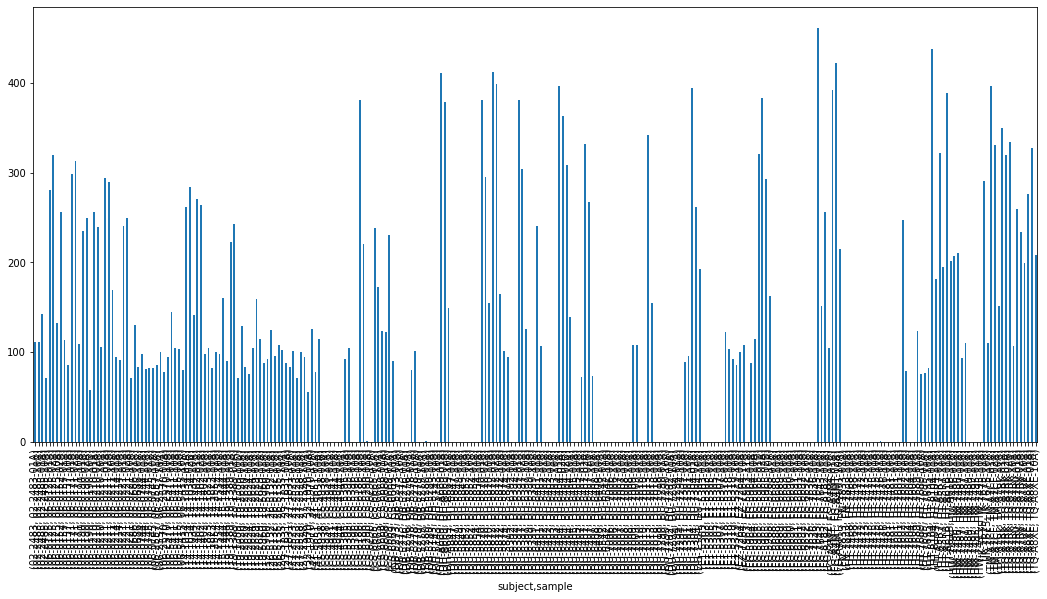

In [70]:
tmp=df[df>threshold].loc[:,:,'HERVK113'].count(axis='columns')
tmp[tmp>=0].plot(kind='bar')
plt.show()

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

## Search for the presence of HKLE insertions with positions unique to tumor or normal

### Copy raw dataframe, remove sample level and clear out the values

compdf2=df.copy()
compdf2.drop(compdf2.loc[compdf2.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)
compdf2=compdf2.droplevel('sample',axis='index')
compdf2.loc[:,:] = 0
compdf2.head(10)

## Ok. This is some dark magic I think. Gotta be a better, cleaner way to do this.

* Loop over the subjects and hkles. (Loops aren't really pythony.)
* Do an "XOR-AND" for the first (tumor 01) and second (normal 10) samples.
* This returns a Boolean mask
* Change it to 0/1
* Subtract the tumor array from the normal array and assign it to the subject/hkle

### This will create a dataframe of positions representing "tumor - normal" so with values of only

* -1 : normal only
*  0 : both or neither
* +1 : tumor only


for subject in df.index.get_level_values('subject').unique():
    for hkle in df.index.get_level_values('hkle').unique():
        tm=(((  df.loc[subject,:,hkle].iloc[0]>0)^(
                df.loc[subject,:,hkle].iloc[1]>0))&(
                df.loc[subject,:,hkle].iloc[0]>0))
        tm.replace([False,True],[0,1],inplace=True)
        nm=(((  df.loc[subject,:,hkle].iloc[0]>0)^(
                df.loc[subject,:,hkle].iloc[1]>0))&(
                df.loc[subject,:,hkle].iloc[1]>0))
        nm.replace([False,True],[0,1],inplace=True)
        compdf2.loc[subject,hkle]=tm.values-nm.values

compdf.equals(compdf2)

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [71]:
n=df.copy()    # NORMAL
t=df.copy()    # TUMOR

In [72]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [73]:
n=n.droplevel('sample',axis='index')
t=t.droplevel('sample',axis='index')

In [74]:
n.head()

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             2   
02-2485 HERVK113             0             0             0             8   
06-0125 HERVK113             0             0             0             6   
        HERVK113             0             0             0             3   
06-0152 HERVK113             0             0             0             3   

                  chr1 1410000  chr1 1580000  chr1 1581000  chr1 2211000  \
subject hkle                                                               
02-2483 HERVK113             3             3             0             0   
02-2485 HERVK113             0             0             0             0   
06-0125 HERVK113             8             3             0             0   
        HERVK113             1             5             0             0   
06-0152 HERVK113             2             3             0             0   

                  chr1 2513000  chr1 2581000  ...  chrY 19535000  \
subject hkle                                  ...                  
02-2483 HERVK113             0             0  ...              0   
02-2485 HERVK113             0             0  ...              0   
06-0125 HERVK113             0             0  ...              0   
        HERVK113             0             0  ...              0   
06-0152 HERVK113             0             0  ...              0   

                  chrY 19536000  chrY 19699000  chrY 19700000  chrY 20552000  \
subject hkle                                                                   
02-2483 HERVK113              0              1              1              0   
02-2485 HERVK113              0              1              0              0   
06-0125 HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   
06-0152 HERVK113              0              1              2              0   

                  chrY 20553000  chrY 20976000  chrY 21047000  chrY 21217000  \
subject hkle                                                                   
02-2483 HERVK113              0              0              0              0   
02-2485 HERVK113              0              0              0              0   
06-0125 HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   
06-0152 HERVK113              0              0              0              0   

                  chrY 21639000  
subject hkle                     
02-2483 HERVK113              0  
02-2485 HERVK113              0  
06-0125 HERVK113              0  
        HERVK113              0  
06-0152 HERVK113              0  

[5 rows x 17409 columns]

In [75]:
t.head()

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             4   
02-2485 HERVK113             0             0             0             3   
06-0125 HERVK113             0             0             0             9   
        HERVK113             0             0             0             6   
06-0152 HERVK113             0             0             0             3   

                  chr1 1410000  chr1 1580000  chr1 1581000  chr1 2211000  \
subject hkle                                                               
02-2483 HERVK113             1             4             0             0   
02-2485 HERVK113             4             4             0             0   
06-0125 HERVK113             6             9             0             0   
        HERVK113             8             3             0             0   
06-0152 HERVK113             2             3             0             0   

                  chr1 2513000  chr1 2581000  ...  chrY 19535000  \
subject hkle                                  ...                  
02-2483 HERVK113             0             0  ...              0   
02-2485 HERVK113             0             0  ...              0   
06-0125 HERVK113             0             0  ...              0   
        HERVK113             0             0  ...              0   
06-0152 HERVK113             0             0  ...              0   

                  chrY 19536000  chrY 19699000  chrY 19700000  chrY 20552000  \
subject hkle                                                                   
02-2483 HERVK113              0              2              0              0   
02-2485 HERVK113              0              0              1              0   
06-0125 HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   
06-0152 HERVK113              0              1              2              0   

                  chrY 20553000  chrY 20976000  chrY 21047000  chrY 21217000  \
subject hkle                                                                   
02-2483 HERVK113              0              0              0              0   
02-2485 HERVK113              0              1              0              0   
06-0125 HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   
06-0152 HERVK113              0              0              0              0   

                  chrY 21639000  
subject hkle                     
02-2483 HERVK113              0  
02-2485 HERVK113              0  
06-0125 HERVK113              0  
        HERVK113              0  
06-0152 HERVK113              0  

[5 rows x 17409 columns]

In [76]:
n_index=n.index
t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [77]:
n_index[n_index != t_index]

MultiIndex([], names=['subject', 'hkle'])

In [78]:
compdf=(((n>0)^(t>0))&(t>0)).replace([False,True],[0,1]) - (((n>0)^(t>0))&(n>0)).replace([False,True],[0,1])

In [79]:
compdf

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
02-2485 HERVK113             0             0             0             0   
06-0125 HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   
06-0152 HERVK113             0             0             0             0   
...                        ...           ...           ...           ...   
TQ-A7RK HERVK113             0             0             0             0   
TQ-A7RV HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   
TQ-A8XE HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   

                  chr1 1410000  chr1 1580000  chr1 1581000  chr1 2211000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
02-2485 HERVK113             1             1             0             0   
06-0125 HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   
06-0152 HERVK113             0             0             0             0   
...                        ...           ...           ...           ...   
TQ-A7RK HERVK113             0             0             0             0   
TQ-A7RV HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   
TQ-A8XE HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   

                  chr1 2513000  chr1 2581000  ...  chrY 19535000  \
subject hkle                                  ...                  
02-2483 HERVK113             0             0  ...              0   
02-2485 HERVK113             0             0  ...              0   
06-0125 HERVK113             0             0  ...              0   
        HERVK113             0             0  ...              0   
06-0152 HERVK113             0             0  ...              0   
...                        ...           ...  ...            ...   
TQ-A7RK HERVK113             0             0  ...              0   
TQ-A7RV HERVK113             0             0  ...              0   
        HERVK113             0             0  ...              0   
TQ-A8XE HERVK113             0             0  ...              0   
        HERVK113             0             0  ...              0   

                  chrY 19536000  chrY 19699000  chrY 19700000  chrY 20552000  \
subject hkle                                                                   
02-2483 HERVK113              0              0             -1              0   
02-2485 HERVK113              0             -1              1              0   
06-0125 HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   
06-0152 HERVK113              0              0              0              0   
...                         ...            ...            ...            ...   
TQ-A7RK HERVK113              0              1              0              0   
TQ-A7RV HERVK113              0              1              0              0   
        HERVK113              0              0              0             -1   
TQ-A8XE HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   

                  chrY 20553000  chrY 20976000  chrY 21047000  chrY 21217000  \
subject hkle                      

### This is cleaner, faster and more pythonic than what follows for compdf.


In [80]:
compdf.head()

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
02-2485 HERVK113             0             0             0             0   
06-0125 HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   
06-0152 HERVK113             0             0             0             0   

                  chr1 1410000  chr1 1580000  chr1 1581000  chr1 2211000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
02-2485 HERVK113             1             1             0             0   
06-0125 HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   
06-0152 HERVK113             0             0             0             0   

                  chr1 2513000  chr1 2581000  ...  chrY 19535000  \
subject hkle                                  ...                  
02-2483 HERVK113             0             0  ...              0   
02-2485 HERVK113             0             0  ...              0   
06-0125 HERVK113             0             0  ...              0   
        HERVK113             0             0  ...              0   
06-0152 HERVK113             0             0  ...              0   

                  chrY 19536000  chrY 19699000  chrY 19700000  chrY 20552000  \
subject hkle                                                                   
02-2483 HERVK113              0              0             -1              0   
02-2485 HERVK113              0             -1              1              0   
06-0125 HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   
06-0152 HERVK113              0              0              0              0   

                  chrY 20553000  chrY 20976000  chrY 21047000  chrY 21217000  \
subject hkle                                                                   
02-2483 HERVK113              0              0              0              0   
02-2485 HERVK113              0              1              0              0   
06-0125 HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   
06-0152 HERVK113              0              0              0              0   

                  chrY 21639000  
subject hkle                     
02-2483 HERVK113              0  
02-2485 HERVK113              0  
06-0125 HERVK113              0  
        HERVK113              0  
06-0152 HERVK113              0  

[5 rows x 17409 columns]

In [81]:
compdf.shape

(150, 17409)

### Keep only positions with any sample with something other than 0

### We lose over 3000 positions

In [82]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [83]:
compdf.shape

(150, 2786)

In [84]:
compdf

chr1 1409000  chr1 1410000  chr1 1580000  chr1 1581000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
02-2485 HERVK113             0             1             1             0   
06-0125 HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   
06-0152 HERVK113             0             0             0             0   
...                        ...           ...           ...           ...   
TQ-A7RK HERVK113             0             0             0             0   
TQ-A7RV HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   
TQ-A8XE HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   

                  chr1 3751000  chr1 5573000  chr1 6304000  chr1 8502000  \
subject hkle                                                               
02-2483 HERVK113             0             0             0             0   
02-2485 HERVK113             0             0             0             0   
06-0125 HERVK113             0             0             0             0   
        HERVK113             0             0             0             0   
06-0152 HERVK113             0             0             0             0   
...                        ...           ...           ...           ...   
TQ-A7RK HERVK113             0             0             1             1   
TQ-A7RV HERVK113             0            -1             0             0   
        HERVK113             0             1             0             0   
TQ-A8XE HERVK113             0             1             1             0   
        HERVK113            -1            -1             0             0   

                  chr1 8912000  chr1 9001000  ...  chrY 12462000  \
subject hkle                                  ...                  
02-2483 HERVK113             0             0  ...              1   
02-2485 HERVK113             0             0  ...              1   
06-0125 HERVK113            -1             0  ...              0   
        HERVK113             1             0  ...              0   
06-0152 HERVK113             0             0  ...              0   
...                        ...           ...  ...            ...   
TQ-A7RK HERVK113             0             0  ...              1   
TQ-A7RV HERVK113             0             1  ...              0   
        HERVK113            -1            -1  ...              1   
TQ-A8XE HERVK113             0             0  ...              0   
        HERVK113             0             0  ...              0   

                  chrY 12463000  chrY 12879000  chrY 13103000  chrY 13104000  \
subject hkle                                                                   
02-2483 HERVK113              0              0              0              0   
02-2485 HERVK113             -1              0             -1              0   
06-0125 HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   
06-0152 HERVK113              0              0              0              0   
...                         ...            ...            ...            ...   
TQ-A7RK HERVK113              0              0              1              0   
TQ-A7RV HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   
TQ-A8XE HERVK113              0              0              0              0   
        HERVK113              0              0              0              0   

                  chrY 15774000  chrY 19699000  chrY 19700000  chrY 20552000  \
subject hkle                      

### Get the chromosome columns for analysis after merging with the metadata

In [85]:
chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
chromosome_columns

KeyError: 'Requested level (chromosome) does not match index name (None)'

### Merge with the metadata for later grouping

In [ ]:
compdf.reset_index(inplace=True)
compdf=compdf.merge(meta,on='subject')
compdf.set_index(['subject','hkle'],inplace=True)
compdf.head()

### More dark magic here. 

* Select all subjects and HERVK113 on the y-axis and all the chromosome columns on the x-axis.
* We will count all the incidence of each of the previously computed "tumor-normal" values
* Then we will transpose and sort descending by "-1". This will put the highest occurence of normal at the top.


In [ ]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

In [ ]:
compdf.loc[pd.IndexSlice[:,hkle],chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[-1],ascending=False).head(10)


In [ ]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

### We see that the unique normal positions aren't really that unique.

### If we do the same, but sort by tumor ...

In [ ]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

In [ ]:
compdf.loc[pd.IndexSlice[:,hkle],chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[1],ascending=False).head(10)


In [ ]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

### These values seem to be a bit more lopsided.

### Further analysis forthcoming.

compdf.loc[pd.IndexSlice[:,'HERVK113'],chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[1],ascending=False).head(10)


Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],

In [ ]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")
#    selected=['subject','sample','Lab kit','trimmer','diag','idh']
    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    if len(selected) > 3: #7:
#        for trimmer in 'bbduk2','cutadapt2':
#            for labkit in dfn['Lab kit'].unique():
        tmp=localdf[selected].copy()
#        tmp=tmp[(tmp['trimmer']==trimmer) & (tmp['Lab kit']==labkit)]
#        tmp=tmp.drop('trimmer',axis='columns')
#        tmp=tmp.drop('Lab kit',axis='columns')
#        tmp.set_index(['subject','sample','diag','idh'],inplace=True)
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        #tmp1=tmp.sort_values(['diag']).T
#        tmp=tmp.sort_values(['idh','diag'])
        tmp=tmp.sort_values([group_column])
        #print(tmp.head())
#        tmp.drop(['subject'],inplace=True,axis='columns')
#        tmp.set_index(['sample','idh'],inplace=True)
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        #lut = dict(zip(diagnoses.unique(), "rgbcmykb"))
        #col_colors = diagnoses.map(lut)
        #print(col_colors)
        #print(tmp.columns)

        tmp=tmp.T

        #print('pal')
        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
    else:
        print("Not enough data to produce cluster maps")
        

In [ ]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

### Flatten the multi-level column names

In [ ]:
compdf.columns= [' '.join(col).strip() for col in compdf.columns.values]
compdf.head()

### Reset Index

In [ ]:
compdf.reset_index(inplace=True)
compdf.head()

In [ ]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

In [ ]:
#for chromosome in sorted(
#    df.columns[df.columns.get_level_values(
#        'chromosome').str.contains("^chr")].get_level_values('chromosome').unique()):
#    print(chromosome)
#    for column in 'primary_diagnosis','IDH','x1p19q','TERT','disease_type','IDH_1p19q_status','WHO_groups','Triple_group','MGMT','gender1':
#        print(column)
#        ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
#            compdf.columns[compdf.columns.str.contains("^"+chromosome+" ")],column,box_p=0.0000001,heat_p=0.1)

In [ ]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

In [ ]:
for column in 'primary_diagnosis','IDH','x1p19q','TERT','disease_type','IDH_1p19q_status','WHO_groups','Triple_group','MGMT','gender1':
    print(column)
    ttests_boxplots_and_heatmaps(compdf[compdf['hkle']==hkle],
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-8,heat_p=0.05)

In [ ]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

In [ ]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [ ]:
pd.set_option('display.max_columns', default_max_columns)

In [ ]:
pd.set_option('display.max_rows',default_max_rows)

In [ ]:
pd.set_option('display.precision', default_precision)